In [37]:
import glob
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import string
from collections import Counter
import re
from collections import OrderedDict
from tqdm import tqdm_notebook as tqdm1
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import operator
import math
from textblob import TextBlob
from num2words import num2words
import pandas as pd
import numpy as np 
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [120]:
#importing dataset
for i in sorted(glob.glob("/Users/ganesh/Desktop/sorted_data_acl/*")):
    for j in sorted(glob.glob(i+'/*')):
        
        name=j.replace('/Users/ganesh/Desktop/sorted_data_acl/','')
        name=name.replace('.','_')
        name=name.replace('/','_')
        name=name+'.csv'
        print(name)
        
        file=open(j,'r',encoding='utf-8',errors='ignore')
        text=file.read()
        pre_data=word_tokenize(text) #Preprocess(text)
        xml_to_df(pre_data,name)
        
       

books_negative_review.csv
here1
books_positive_review.csv
here1
dvd_negative_review.csv
here1
dvd_positive_review.csv
here1
dvd_unlabeled_review.csv
here1
electronics_negative_review.csv
here1
electronics_positive_review.csv
here1
electronics_unlabeled_review.csv
here1
kitchen_&_housewares_negative_review.csv
here1
kitchen_&_housewares_positive_review.csv
here1
kitchen_&_housewares_unlabeled_review.csv
here1


In [119]:
# preprocessing each review 
def Preprocess(text):
    stopword= set(stopwords.words('english'))
    lemmatizer=WordNetLemmatizer()
    text=str(text)
    text=text.lower()#to lower case
    tokens=word_tokenize(text)# tokenized
    table = str.maketrans('','', string.punctuation)# removed punctuations
    words=[w.translate(table) for w in tokens]
    finalwords=list(filter(None, words))# removed null sring
    finalwords1=[]
    f_words=[]
    for ww in finalwords:
        if lemmatizer.lemmatize(ww) not in stopword:#remove stop words
            finalwords1.append(lemmatizer.lemmatize(ww)) #lemmatization
    for w in finalwords1:
        if w.isnumeric():
            f_words.append(num2words(int(w)))
        else:
            f_words.append(w)
    return f_words
    

In [118]:
#converting xml raw data to pandas dataframe
def xml_to_df(tokens,file_name):
    idss=[]
    asin=[]
    product_name=[]
    product_type=[]
    helpful=[]
    rating=[]
    title=[]
    review_text=[]
    for i in range(len(tokens)):
        if(tokens[i]=='<' and tokens[i+1]=='unique_id' and tokens[i+2]=='>'):
            j=i+3
            kp=''
            while((tokens[j]=='<' and tokens[j+1]=='/unique_id' and tokens[j+2]=='>')==0):
                kp=kp+tokens[j]
                j+=1
            idss.append(kp)
        else: 
            if(tokens[i]=='<' and tokens[i+1]=='asin' and tokens[i+2]=='>'):
                j=i+3
                kp=''
                while((tokens[j]=='<' and tokens[j+1]=='/asin' and tokens[j+2]=='>')==0):
                    kp=kp+tokens[j]
                    j+=1
                asin.append(kp)
            else:
                if(tokens[i]=='<' and tokens[i+1]=='product_name' and tokens[i+2]=='>'):
                    j=i+3
                    kp=''
                    while((tokens[j]=='<' and tokens[j+1]=='/product_name' and tokens[j+2]=='>')==0):
                        kp=kp+tokens[j]+' '
                        j+=1
                    product_name.append(kp)
                else:
                    if(tokens[i]=='<' and tokens[i+1]=='product_type' and tokens[i+2]=='>'):
                        j=i+3
                        kp=''
                        while((tokens[j]=='<' and tokens[j+1]=='/product_type' and tokens[j+2]=='>')==0):
                            kp=kp+tokens[j]
                            j+=1
                        product_type.append(kp)
                    else:
                        if(tokens[i]=='<' and tokens[i+1]=='helpful' and tokens[i+2]=='>'):
                            j=i+3
                            kp=''
                            while((tokens[j]=='<' and tokens[j+1]=='/helpful' and tokens[j+2]=='>')==0):
                                kp=kp+tokens[j]
                                j+=1
                            helpful.append(kp)
                        else:
                            if(tokens[i]=='<' and tokens[i+1]=='rating' and tokens[i+2]=='>'):
                                j=i+3
                                kp=''
                                while((tokens[j]=='<' and tokens[j+1]=='/rating' and tokens[j+2]=='>')==0):
                                    kp=kp+tokens[j]
                                    j+=1
                                rating.append(kp)
                            else:
                                if(tokens[i]=='<' and tokens[i+1]=='title' and tokens[i+2]=='>'):
                                    j=i+3
                                    kp=''
                                    while((tokens[j]=='<' and tokens[j+1]=='/title' and tokens[j+2]=='>')==0):
                                        kp=kp+tokens[j]+' '
                                        j+=1
                                    title.append(kp)
                                else:
                                    if(tokens[i]=='<' and tokens[i+1]=='review_text' and tokens[i+2]=='>'):
                                        j=i+3
                                        kp=''
                                        while((tokens[j]=='<' and tokens[j+1]=='/review_text' and tokens[j+2]=='>')==0):
                                            kp=kp+tokens[j]+' '
                                            j+=1
                                        review_text.append(kp)

    df = pd.DataFrame() 
    df['idss']=idss
    df['asin']=asin
    df['product_name']=product_name
    df['product_type']=product_type
    df['rating']=rating
    df['title']=title
    df['review_text']=review_text
    fanme='/Users/ganesh/Desktop/IR_Project_Home/'+file_name
    df.to_csv(r''+fanme)
    print("here1")


In [3]:
#importing dataset
dp=pd.read_csv("/Users/ganesh/Desktop/IR_Project_Home/electronics_review.csv")

In [4]:
dp

,Unnamed: 0,idss,asin,product_name,product_type,rating,title,review_text
0,0,B00006HYUB:everyone_should_own_one:d._john_''l...,B00006HYUB,APC Back-UPS ES 500 Backup Battery and Surge P...,electronics,5.0,Everyone should own one,I purchased this unit due to frequent blackout...
1,1,B00006HYUB:breif_review:scott_park,B00006HYUB,APC Back-UPS ES 500 Backup Battery and Surge P...,electronics,5.0,Breif Review,I ordered 3 APC Back-UPS ES 500s on the recomm...
2,2,B00006HYUB:works_fine.:dee_richards_''deeanaly...,B00006HYUB,APC Back-UPS ES 500 Backup Battery and Surge P...,electronics,4.0,Works fine .,Wish the unit had a separate online/offline li...
3,3,B000067VBM:affordable_and_effective:jason_dick...,B000067VBM,50-pack Slim CD/DVD Jewel Cases ( 5mm ) Clear ...,electronics,5.0,Affordable and effective,Cheaper than thick CD cases and less prone to ...
4,4,B00008SCFU:it_is_a_good_product_:kiran_k._sing...,B00008SCFU,Kingston 256 MB Secure Digital Card ( SD/256 )...,electronics,5.0,It is a good product,Hi I brought 256 MB Kingston SD card from Amaz...
5,5,B0007P4G76:perfect:r._johnson,B0007P4G76,Xtreme TB264DKO 264-Disc CD/DVD Case : Electro...,electronics,5.0,perfect,This product was perfect . it 's a sturdy case...
6,6,B0000DK3I4:kingston_1gb_sd_card_review:eugene_ong,B0000DK3I4,Kingston 512 MB Secure Digital Card ( SD/512 )...,electronics,5.0,Kingston 1GB SD Card Review,Great value for your money . Kingston has alwa...
7,7,B0000DK3I4:very_good_sd_card:gabriel_gore_''ge...,B0000DK3I4,Kingston 512 MB Secure Digital Card ( SD/512 )...,electronics,5.0,Very good SD Card,"I like it very much , I use it in an outdoor t..."
8,8,B0002MSTWC:flash_card:allen_l._mccartney,B0002MSTWC,Lexar Media 512 MB 80x Pro Series Compact Flas...,electronics,5.0,Flash Card,I had no problems with this card and the deliv...
9,9,B0002MSTWC:works_great_for_me!:robert_farlee,B0002MSTWC,Lexar Media 512 MB 80x Pro Series Compact Flas...,electronics,5.0,Works great for me !,"After going through the reviews , I bought thi..."


In [5]:
#Initializing all dictonares
dic_products_review_text={}#product :review body dictonary
dic_products_review_title={}#product : review title dictonary
dic_products_aspect={}# product and its ascept in body of riview dictonary
dic_products_aspect_title={}# product and its aspect in title dictonary
for i in range(len(dp)):
    templist=[]
    prod_name=dp["product_name"][i]
    if prod_name in dic_products_review_text:
        dic_products_review_text[prod_name].append(dp["review_text"][i])
        dic_products_review_title[prod_name].append(dp["title"][i])
        
    else:
        dic_products_review_text[prod_name]=[]
        dic_products_review_title[prod_name]=[]
        dic_products_aspect[prod_name]={}
        dic_products_aspect_title[prod_name]={}
        dic_products_review_text[prod_name].append(dp["review_text"][i])
        dic_products_review_title[prod_name].append(dp["title"][i])

In [6]:
#average product rating
product_rating={}
for i in range(len(dp)):
    prod_name=dp["product_name"][i]
    if(prod_name in product_rating):
        product_rating[prod_name]+=dp["rating"][i]
    else:
        product_rating[prod_name]=dp["rating"][i]
for prod in product_rating :
     product_rating[prod]= product_rating[prod]/len(dic_products_review_text[prod])
    

In [7]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [8]:
def adjnoun_pairs(x):
    doc = nlp(u''+x)
    noun_adj_pairs = []
    for i,token in enumerate(doc):
        if token.pos_ not in ('NOUN','PROPN'):
            continue
        for j in range(i+1,len(doc)):
            if doc[j].pos_ == 'ADJ':
                noun_adj_pairs.append([token,doc[j]])
                break
    return noun_adj_pairs

In [9]:
#importing negative word file
file1=open("/Users/ganesh/Desktop/Negative-word.txt",'r',encoding='utf-8',errors='ignore')
text1=file1.read()
negative_word_list=text1.split(',')


In [11]:
#finding sentense is negative or not
def is_negative(xx,product):
    pr_review=dic_products_review_text[product]
    rv_tok=sent_tokenize(pr_review[0])
    for sent in rv_tok:
        sent_word=word_tokenize(sent)
        i=0
        while(sent_word[i]!=xx and i<len(sent_word)-1):
            if(sent_word[i] in list(negative_word_list)):
                return -1
            i+=1
    return 1
  

In [12]:
#finding polarity
def findpol(xx,product):
    #print(xx)
    x=TextBlob(xx)
    if(is_negative(xx,product)== -1):
        print("here")
        return ((x.sentiment.polarity)*-1)
        
    
    return (x.sentiment.polarity)

In [13]:
# for review body text => calculate aspect count,polarity
dic_products_aspect_count={}
for products in dic_products_review_text:
    dic_products_aspect_count[products]={}
    aspect_count={}
    for i in range(len(dic_products_review_text[products])):
        templist=[]
        templist=adjnoun_pairs(dic_products_review_text[products][i])
        for aspects in templist:
            if aspects[0] not in dic_products_aspect[products].keys():
                aspect_count[str(aspects[0])]=1
                dic_products_aspect[products][str(aspects[0])]=findpol(str(aspects[1]),products)
            #print(aspects[0])
            else:
                aspect_count[str(aspects[0])]+=1
                dic_products_aspect[products][str(aspects[0])]+=findpol(str(aspects[1]),products)
    dic_products_aspect_count[products]=aspect_count
    for k in aspect_count.keys():
        dic_products_aspect[products][k]=dic_products_aspect[products][k]/aspect_count[k]
        
                

In [14]:
#for title 
dic_products_aspect_count_title={}
for products in dic_products_review_title:
    dic_products_aspect_count_title[products]={}
    aspect_count={}
    for i in range(len(dic_products_review_title[products])):
        templist=[]
        templist=adjnoun_pairs(dic_products_review_title[products][i])
        for aspects in templist:
            if aspects[0] not in dic_products_aspect_title[products].keys():
                aspect_count[str(aspects[0])]=1
                dic_products_aspect_title[products][str(aspects[0])]=findpol(str(aspects[1]),products)
            #print(aspects[0])
            else:
                aspect_count[str(aspects[0])]+=1
                dic_products_aspect_title[products][str(aspects[0])]+=findpol(str(aspects[1]),products)
    dic_products_aspect_count_title[products]=aspect_count
    
    for k in aspect_count.keys():
        dic_products_aspect_count_title[products][k]=dic_products_aspect_count_title[products][k]/aspect_count[k]
        

In [26]:
final_precision=[]
final_recall=[]
final_f1score=[]
final_ndcg15=[]
final_pr_p=[]
final_pr_r=[]
final_aspect=['quality','sound','memory','display','screen']
final_retrived=[]

In [32]:
#calculating final score with respect to aspect with 60% weight to title and 40% weight to body of review
aspect_input1=input("Enter aspect:")
aspect_input1=word_tokenize(aspect_input1)
print(aspect_input1)
top_product={}
for aspect_input in aspect_input1:
    for products in dic_products_review_text:
        score1=0
        if(aspect_input in dic_products_aspect[products].keys()):
            score1=dic_products_aspect[products][aspect_input]*dic_products_aspect_count[products][aspect_input]
            #print(products,'==',dic_products_aspect[products][aspect_input])
        score2=0    
        if(aspect_input in dic_products_aspect_title[products].keys()):
            score2=dic_products_aspect_title[products][aspect_input]*dic_products_aspect_count_title[products][aspect_input]

        if(products in top_product ):
            top_product[products]+=(6*score2+4*score1)+product_rating[products]
        else:
            top_product[products]=(6*score2+4*score1)+product_rating[products]
            
retrived_product1=dict( sorted(top_product.items(), key=operator.itemgetter(1),reverse=True))
retrived_product_list=list(retrived_product1.keys())
retrived_products=[]
for i in range(30):
    retrived_products.append(retrived_product_list[i])
    

ground_truth=ground_truth1[aspect_input]
intesection=set(ground_truth).intersection(set(retrived_products))
final_retrived.append(retrived_products)
ppp=len(intesection)/len(retrived_products)
rrr=len(intesection)/len(ground_truth)
fscore=(2*ppp*rrr)/(rrr+ppp)
print("ppp=",ppp,"|| rrr=",rrr,"||f1=",fscore)
rel=[]
for z in retrived_products:
    if(z in ground_truth):
        rel.append(1)
    else:
        rel.append(0)
ndcgat15=ndcg_at_k(np.array(rel),15)
print("ndcg=",ndcgat15)
#
total_relevant=0
for i in rel:
    if(i>0):
        total_relevant+=1
precision=[]
recall=[]
relevant=0
retrived=0
for i in range(len(rel)):
    if(rel[i]>0):
        relevant+=1
        retrived+=1
    else:
        retrived+=1
    
    precision.append(relevant/retrived)
    recall.append(relevant/total_relevant)

#



final_precision.append(ppp)
final_recall.append(rrr)
final_f1score.append(fscore)
final_ndcg15.append(ndcgat15)
final_pr_p.append(precision)
final_pr_r.append(recall)


Enter aspect:screen
['screen']
ppp= 0.9 || rrr= 0.8181818181818182 ||f1= 0.8571428571428572
ndcg= 0.9025099854522923


In [16]:
#finding dcg at k
def dcg_at_k(score, k = None):
    
    if k is not None:
        score = score[:k]

    gain = 2 ** score - 1
    discounts = np.log2(np.arange(2, score.size + 2))
    dcg = np.sum(gain / discounts)
    return dcg

In [17]:
#finding ndcg at k
def ndcg_at_k(score, k = None):
    
    actual_dcg = dcg_at_k(score, k)
    sorted_score = np.sort(score)[::-1]
    best_dcg = dcg_at_k(sorted_score, k)
    ndcg = actual_dcg / best_dcg
    return ndcg


In [ ]:
#Mannually annoted ground truth dictonary

In [18]:
ground_truth1={}

In [19]:
ground_truth1['quality']=['Kensington Slim Type Keyboard - PC ( 64365 ) : Electronics ',
                          'Olympus WS-320M 1 GB Digital Voice Recorder and Music Player : Electronics ',
 'Panasonic KX-TG5673B 5.8 GHz FHSS GigaRange Digital Cordless Telephone with Dual Handsets : Electronics ',
 
                          'Belkin 7-Outlet Surgemaster Home Series - F9H710-06 : Electronics ',
 'Belkin A3L791-S 25-Foot RJ45 CAT 5e Snagless Molded Patch Cable ( Blue ) : Electronics ',
 'Monster Cable QL GAS-H QuickLock Gold Angled Spade Connectors ( 2 Pair ) : Electronics ',
 'Panasonic KX-TG5771S 5.8 GHz FHSS GigaRange Expandable Digital Cordless Answering System : Electronics ',
 
 'Vtech I5871 - Expandable System w/ digital Answering Device , Color Handset Display & Dual Caller ID : Electronics ',
 'Creative Zen Nano Plus 1 GB MP3 Player ( Blue ) : Electronics ',
 'Panasonic KX-TG5761S 5.8 GHz FHSS GigaRange Expandable Digital Cordless Telephone : Electronics ',
                          'Bose SoundDock digital music system for iPod ( Black ) : Electronics ',
 'Creative Zen Micro Photo 4 GB MP3 Player Black : Electronics ',
 "Syntax Olevia LT30HV 30 '' HD-Ready Flat-Panel LCD TV : Electronics ",
 'Epson T009201 Stylus Photo Color Cartridge : Electronics ',
 
 'HP DeskJet 3845 Color Inkjet Printer : Electronics ',
 'Logitech Quickcam for Notebooks Pro : Electronics ',
 'Samsung DVD-R145 DVD Recorder : Electronics ',
                          'MAXXUM from SwissGear by Wenger Computer Backpack Red : Electronics ',
 'Ultimate Ears Super.fi 5 EB Earphones ( Black ) : Electronics ',
 'Monster Reference PowerCenter HTS 3500 MKII : Electronics ',
 'Linksys PAP2 Phone Adapter for Vonage Internet Phone Service : Electronics ',
 
 'Monster Cable MP HTS 1000 PowerCenter with Clean Power Stage 2 ( v.2.0 ) : Electronics ',
 'Apple 4 GB iPod Mini Pink M9435LL/A : Electronics ',
 'MACALLY IceTune Stereo Speaker and Charger : Electronics ',
 'Microsoft Digital Media Pro Keyboard : Electronics ',
 'Creative Labs USB SoundBlaster Live ! 24-Bit External Sound Card : Electronics ',
 'JBL Creature II 3-Piece Powered Speaker System : Electronics ',
 'Canon BCI-6Y Yellow Ink Tank : Electronics ',
 'SanDisk SDMX4-2048 Sansa e250 2 GB MP3 Player with SD Expansion Slot : Electronics ',
 'NeatReceipts Scanalizer Professional 2.5 Mobile Scanner & Software Combination for Business Cards , Expense Management and Reporting , Document Organization , Scanning & Copying : Electronics ',
 
 'HP OfficeJet 7410 All-in-One : Electronics ',
 'Sennheiser EH-150 Evolution Hi-Fi Stereo Headphones : Electronics '
                         'Logitech Wireless Headphones for MP3 : Electronics ']



In [20]:
ground_truth1['memory']=['Sony 1 GB Memory Stick Pro ( MSX1GS/GST ) : Electronics ',
 'SanDisk MOBILEMATE MS - 4 IN 1 ( SDDR-107-A10M , Retail Package ) : Electronics ',
 'SanDisk SDSDH-1024-901 1 GB Ultra II Secure Digital Memory Card ( Retail Package ) : Electronics ',
 'Sony ICD-MX20 Memory Stick Pro Duo Digital Voice Recorder : Electronics ',
 'Sony 1 GB Memory Stick PRO Duo Media ( MSXM1GST ) : Electronics ',
 'HP DVD Movie Writer dc4000 : Electronics ',
 'SanDisk SDMSG-1024 Pro Duo 1 GB Gaming Memory Stick : Electronics ',
 'SanDisk 1GB miniSD Card ( SDSDM-1024-A10M , Retail Package ) : Electronics ',
 'Kingston 1GB SecureDigital Flash Card ( SD/1GB ) : Electronics ',
 '50-pack Slim CD/DVD Jewel Cases ( 5mm ) Clear : Electronics ',
 'Kingston 256 MB Secure Digital Card ( SD/256 ) : Electronics ',
 'Xtreme TB264DKO 264-Disc CD/DVD Case : Electronics ',
 'Kingston 512 MB Secure Digital Card ( SD/512 ) : Electronics ',
 'Lexar Media 512 MB 80x Pro Series Compact Flash Card ( CF512-80-380 ) : Electronics ',
 'Kodak 8 - in - 1 Multi-card Reader , KRW8IN1SCS : Electronics ',
 'Targus PAUH212U 7 Port USB 2.0 Hub : Electronics ',
 'SanDisk SDCFH-512-901 512 MB Ultra II CompactFlash Card ( Retail Package ) : Electronics ',
 'Canon S830D Photo Printer : Electronics ',
 'SanDisk 2 GB Ultra II Memory Stick PRO Duo : Electronics ',
 'Sandisk 512 MB Secure Digital Ultra II ( SDSDH-512-901 , Retail Package ) : Electronics ',
 'Kingston 512MB Elite Pro Secure Digital Memory Card ( SD/512-S ) : Electronics ',
 'Sony BCG-34HE4 Super-Quick Worldwide Battery Charger with 4 AA NiMH Batteries : Electronics ',
 'Logitech NuLOOQ Navigator ( 965162-0403 ) : Electronics ',
 'SanDisk SDDR-88-A15 8-in-1 USB 2.0 Hi-speed Reader ( Retail Package ) : Electronics ',
 'Velocity DVD-R 4X 4.7GB , 10-Spindle : Electronics ',
 'SanDisk SDSDB-512-A10 512 MB Secure Digital Card ( Retail Package ) : Electronics ',
 'Hewlett Packard CD-Writer C4503A 9510i 12x8x32 Internal EIDE Kit : Electronics ',
 'Targus PAUH216U 4 Port Slim USB 2.0 Hub : Electronics ',
 'Sony BCG-34HRMF4 Super Quick Charger with LCD Indicator and 4 AA Batteries : Electronics ',
 'Wacom Intuos3 6X11 Pen Tablet : Electronics ',
 'SanDisk 2 GB SD Memory Card ( SDSDB-2048-A10 , Retail Package ) : Electronics ',
 'Memorex DVD+R 16x 4.7GB 50 Pack Spindle : Electronics ',
 'Panasonic DMR-ES10S DIGA Series DVD Recorder ( Silver ) : Electronics ']

In [21]:
ground_truth1['display']=['Apple 4 GB iPod Nano Green ( 2nd Generation ) : Electronics ',
    'Garmin GPSMap 76CSx Handheld Marine GPS Navigator : Electronics ',
 'Boston Acoustics Receptor Clock Radio ( Charcoal ) : Electronics ',
                          'Panasonic DMR-ES10S DIGA Series DVD Recorder ( Silver ) : Electronics ',
 'Panasonic SA-XR70S 6.1 Channel Surround Sound Home Theater Audio / Video Receiver - Silver : Electronics ',
 "Sony KDFE42A10 42 '' LCD Rear Projection Television : Electronics ",
                          'ADS Tech Video Xpress USBAV-191-EF : Electronics ',
 "ViewSonic Optiquest Q9b 19 '' LCD Monitor : Electronics ",
 'Sennheiser HD 457 Traditional Open Hi-Fi Stereo Headphones ( Silver ) : Electronics ',
         'Sony HT-DDW700 Complete 5.1-Channel DVD Home Theater System : Electronics ',
 "Samsung 215TW 21 '' LCD Monitor : Electronics ",
 '50-pack Slim CD/DVD Jewel Cases ( 5mm ) Clear : Electronics ',
 'Kingston 256 MB Secure Digital Card ( SD/256 ) : Electronics ',
 'Xtreme TB264DKO 264-Disc CD/DVD Case : Electronics ',
 'Kingston 512 MB Secure Digital Card ( SD/512 ) : Electronics ',
 'Lexar Media 512 MB 80x Pro Series Compact Flash Card ( CF512-80-380 ) : Electronics ',
 'Kodak 8 - in - 1 Multi-card Reader , KRW8IN1SCS : Electronics ',
 'SanDisk SDCFH-512-901 512 MB Ultra II CompactFlash Card ( Retail Package ) : Electronics ',
 'Lexar Media 1 GB 80x Pro Series Compact Flash Card ( CF1GB-80-380 ) : Electronics ',
 'SanDisk 2 GB Ultra II Memory Stick PRO Duo : Electronics ',
 'Sandisk 512 MB Secure Digital Ultra II ( SDSDH-512-901 , Retail Package ) : Electronics ',
 'SanDisk SDSDH-1024-901 1 GB Ultra II Secure Digital Memory Card ( Retail Package ) : Electronics ',
 'Kingston 512MB Elite Pro Secure Digital Memory Card ( SD/512-S ) : Electronics ',
 'Sony BCG-34HE4 Super-Quick Worldwide Battery Charger with 4 AA NiMH Batteries : Electronics ',
 'Logitech NuLOOQ Navigator ( 965162-0403 ) : Electronics ',
 'SanDisk SDDR-88-A15 8-in-1 USB 2.0 Hi-speed Reader ( Retail Package ) : Electronics ',
 'Velocity DVD-R 4X 4.7GB , 10-Spindle : Electronics ',
 'SanDisk SDSDB-512-A10 512 MB Secure Digital Card ( Retail Package ) : Electronics ',
 'Hewlett Packard CD-Writer C4503A 9510i 12x8x32 Internal EIDE Kit : Electronics ',
 'Targus PAUH216U 4 Port Slim USB 2.0 Hub : Electronics ',
 'Sony BCG-34HRMF4 Super Quick Charger with LCD Indicator and 4 AA Batteries : Electronics ',
 'Wacom Intuos3 6X11 Pen Tablet : Electronics ',
 'SanDisk 2 GB SD Memory Card ( SDSDB-2048-A10 , Retail Package ) : Electronics ']



In [22]:
ground_truth1['screen']=["Apple Cinema 30 '' HD Flat-Panel Display : Electronics ",
'Vtech I5871 - Expandable System w/ digital Answering Device , Color Handset Display & Dual Caller ID : Electronics ',
 'Creative Zen Micro Photo 4 GB MP3 Player Black : Electronics ',
 "HP F2105 21 '' LCD Flat Panel Monitor : Electronics ",
                         'SanDisk 2 GB Ultra II Memory Stick PRO Duo : Electronics ',
 'Garmin GPS 18 Deluxe GPS Sensor with nRoute and City Select Navigation Software ( USB Interface ) : Electronics ',
 'Monster Reference PowerCenter HTS 3500 MKII : Electronics ',
 'Creative Zen Vision W 30 GB Widescreen Multimedia Player ( Black ) : Electronics ',
  'Sandisk 512 MB Secure Digital Ultra II ( SDSDH-512-901 , Retail Package ) : Electronics ',
 'Samsung DVD-R145 DVD Recorder : Electronics ',
 'Panasonic SA-XR70S 6.1 Channel Surround Sound Home Theater Audio / Video Receiver - Silver : Electronics ',
 'Apple 4 GB iPod Nano Pink ( 2nd Generation ) : Electronics ',
 'Creative Zen Vision : M 30 GB MP3 and Video Player ( White ) : Electronics ',
 'Monster Cable MVSV2-1M High-Resolution S-Video Cable ( 1 Meter ) : Electronics ',
         'Logitech NuLOOQ Navigator ( 965162-0403 ) : Electronics ',
 "Samsung HL-R5067W 50 '' HD-Ready DLP TV : Electronics ",
 "Sony KDFE42A10 42 '' LCD Rear Projection Television : Electronics ",
 "ViewSonic Optiquest Q9b 19 '' LCD Monitor : Electronics ",
 "Samsung HL-S6187W 61 '' 1080p DLP HDTV : Electronics ",
 'Panasonic KX-TG5672B 5.8 GHz FHSS GigaRange Digital Cordless Answering System with Dual Handsets : Electronics ',
 'Panasonic DMR-ES15S DVD Recorder with DV Input : Electronics ',
 'Creative Zen V 4 GB Portable Media Player ( Black/Blue ) : Electronics ',
 'Targus PA230U Compact Universal 6 Inch Monitor Stand - Black : Electronics ',
 'Compaq iPAQ 3635 Pocket PC Bundle ( with Compact Flash Jacket ) : Electronics ',
 'Dell Axim X51v PDA 624 MHz Processor , 256MB ROM / 64MB SDRAM , 3.7 inches 480*640 VGA TFT Color LCD , BlueTooth / WiFi 802.11b/Infrared : Electronics ',
 'Cobra Nav One 4500 Mobile GPS Navigation System with Traffic : Electronics ',
 '50-pack Slim CD/DVD Jewel Cases ( 5mm ) Clear : Electronics ',
 'Kingston 256 MB Secure Digital Card ( SD/256 ) : Electronics ',
 'Xtreme TB264DKO 264-Disc CD/DVD Case : Electronics ',
 'Kingston 512 MB Secure Digital Card ( SD/512 ) : Electronics ',
 'Lexar Media 512 MB 80x Pro Series Compact Flash Card ( CF512-80-380 ) : Electronics ',
 'Kodak 8 - in - 1 Multi-card Reader , KRW8IN1SCS : Electronics ',
 'Targus PAUH212U 7 Port USB 2.0 Hub : Electronics ']


In [23]:
ground_truth1['sound']=['Sony SS-MF650H 3-Way Floorstanding Speakers ( Pair ) : Electronics ',
 'Sennheiser PC155 Traditional Binaural PC Headset with USB and Noise canceling : Electronics ',
 'Monster Cable QL GAS-H QuickLock Gold Angled Spade Connectors ( 2 Pair ) : Electronics ',
         'Sony MDR-V6 Monitor Series Headphones with CCAW Voice Coil : Electronics ',
 'Logitech x-230 2.1 2-Piece Dual Drive Speakers with Ported Subwoofer : Electronics ',
                        'Griffin Technology 4026-LCDT iTrip LCD FM Transmitter for iPod : Electronics ',
     'Sennheiser HD-212 Headphones ( Silver ) : Electronics ',
 'Shure E2c-n Sound Isolating Earphones ( Black ) : Electronics ',
 'Sony MDR-DS3000 Infrared Wireless Digital Surround Headphones : Electronics ',
 'Panasonic SA-XR55K 6.1-Channel A/V Home Theater Receiver , Black : Electronics ',
 'Sony HT-DDW700 Complete 5.1-Channel DVD Home Theater System : Electronics ',
 'Olympus WS-320M 1 GB Digital Voice Recorder and Music Player : Electronics ',
 'Koss R-200 Studio Quality Home Stereophone : Electronics ',
                'Sennheiser PC150 Noise Cancelling PC Headset : Electronics ',
 'Apple 4 GB iPod Nano Pink ( 2nd Generation ) : Electronics ',
 'JBL Creature II 3-Piece Powered Speaker System : Electronics ',
 'Panasonic RP-HT21 Portable Headphones : Electronics ',
 'JBL Duet Speakers , White : Electronics ',
 'Sennheiser EH-150 Evolution Hi-Fi Stereo Headphones : Electronics ',
 
 'Logitech mm50 Portable Speakers for iPod Black : Electronics ',
 'Logitech Quickcam Fusion ( 961403-0403 ) : Electronics ',
 'AKG K 26 P - Headphones ( ear-cup ) : Electronics ',
 'Sony MDR-EX51LP Fontopia In-The-Ear Headphones ( White ) : Electronics ',
 'Creative Zen Nano Plus 1 GB MP3 Player Red : Electronics ',
 'Panasonic RP-HC70 Noise Cancelling Headphones : Electronics ',
 'Ultimate Ears Super.fi 5 EB Earphones ( Black ) : Electronics ',
 'Sony MDR-EX51LP Fontopia Headphones : Electronics ',
 'Sennheiser HD 457 Traditional Open Hi-Fi Stereo Headphones ( Silver ) : Electronics ',
 'Digilife Fold-Up Compact Speakers for Apple iPod ( Travel Size ) : Electronics ',
 'Yamaha YSP-1 Digital Sound Projector : Electronics ',
 'Klipsch ProMedia 2.1 THX Certified Computer 3-Speaker System ( Black ) : Electronics ',
 'Samsung DVD-HD841 Up-Converting DVD Player : Electronics ',
 "Sony KV-36FS17 36 '' Flat-Screen TV : Electronics "]



In [24]:
# for quality ppp= 0.9666666666666667 || rrr= 0.90625 ||f1= 0.9354838709677419 ndcg= 0.9573476954303488
# for memory  ppp= 0.9333333333333333 || rrr= 0.8484848484848485 ||f1= 0.888888888888889 ndcg= 0.9486415077613566
#for display ppp= 0.9 || rrr= 0.8181818181818182 ||f1= 0.8571428571428572 ndcg= 0.865750379358458
#for screen ppp= 0.9 || rrr= 0.8181818181818182 ||f1= 0.8571428571428572 ndcg= 0.9025099854522923
# for sound ppp= 0.8666666666666667 || rrr= 0.7878787878787878 ||f1= 0.8253968253968254 ndcg= 0.8088806399322565

<IPython.core.display.Javascript object>


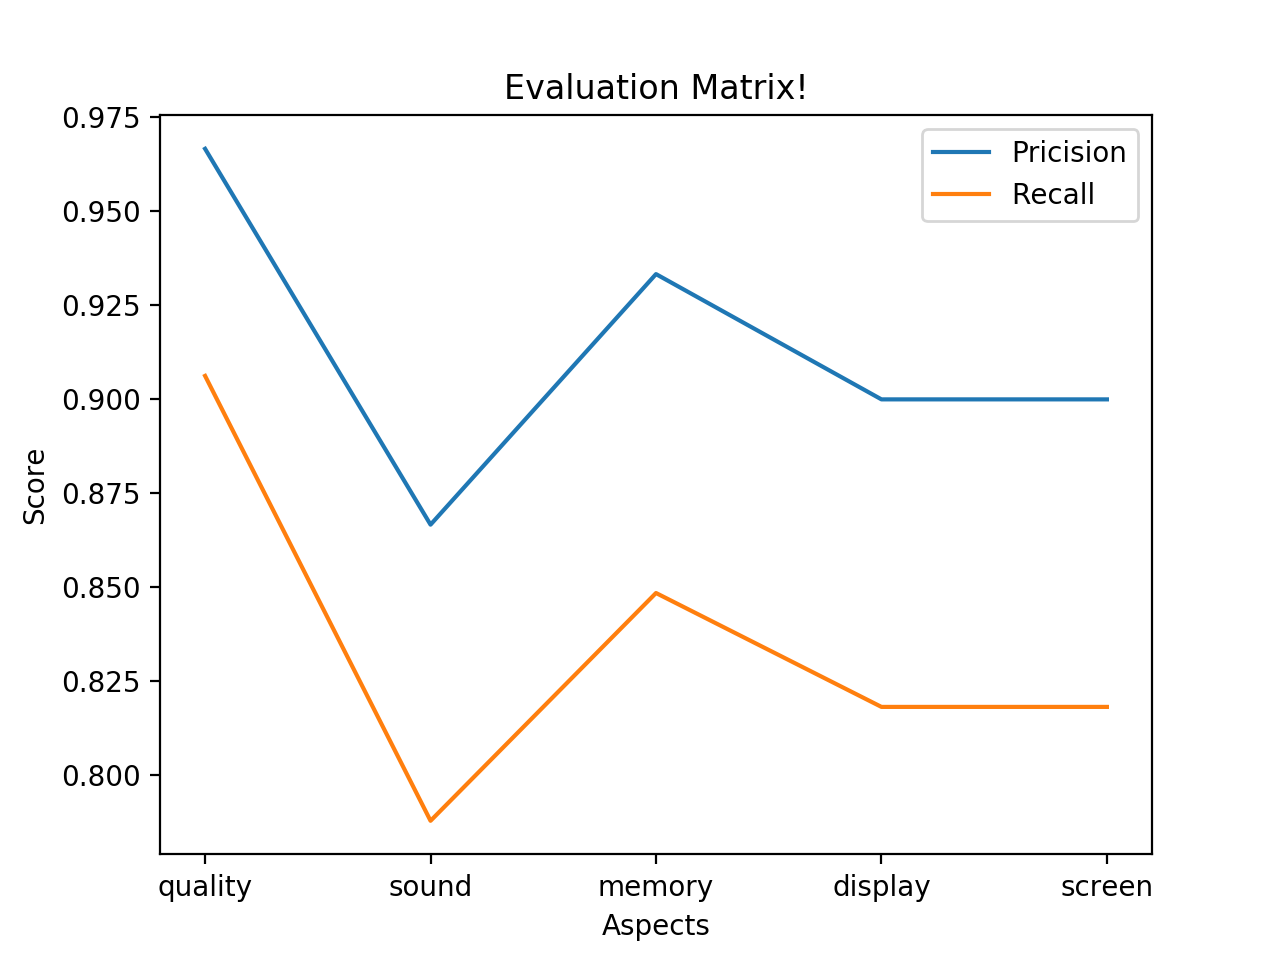

In [473]:
%matplotlib notebook
import matplotlib.pyplot as plt 
plt.plot(final_aspect, final_precision, label = "Pricision") 
plt.plot(final_aspect, final_recall, label = "Recall")
plt.xlabel('Aspects') 
plt.ylabel('Score') 
plt.title('Evaluation Matrix!') 
plt.legend() 
plt.show()

<IPython.core.display.Javascript object>


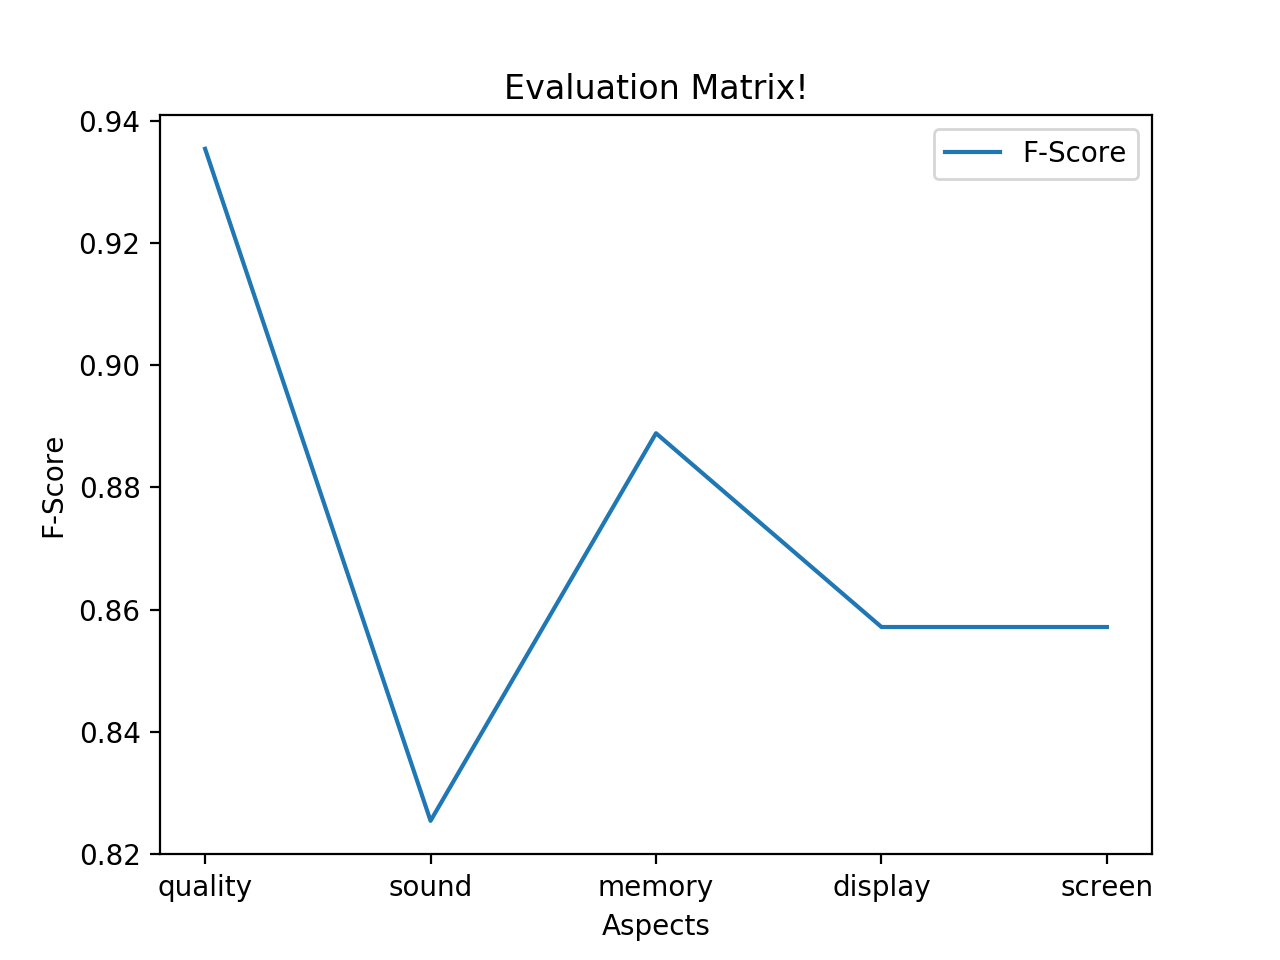

In [474]:
%matplotlib notebook
plt.plot(final_aspect, final_f1score, label = "F-Score") 
plt.xlabel('Aspects') 
plt.ylabel('F-Score') 
plt.title('Evaluation Matrix!') 
plt.legend() 
plt.show()

<IPython.core.display.Javascript object>


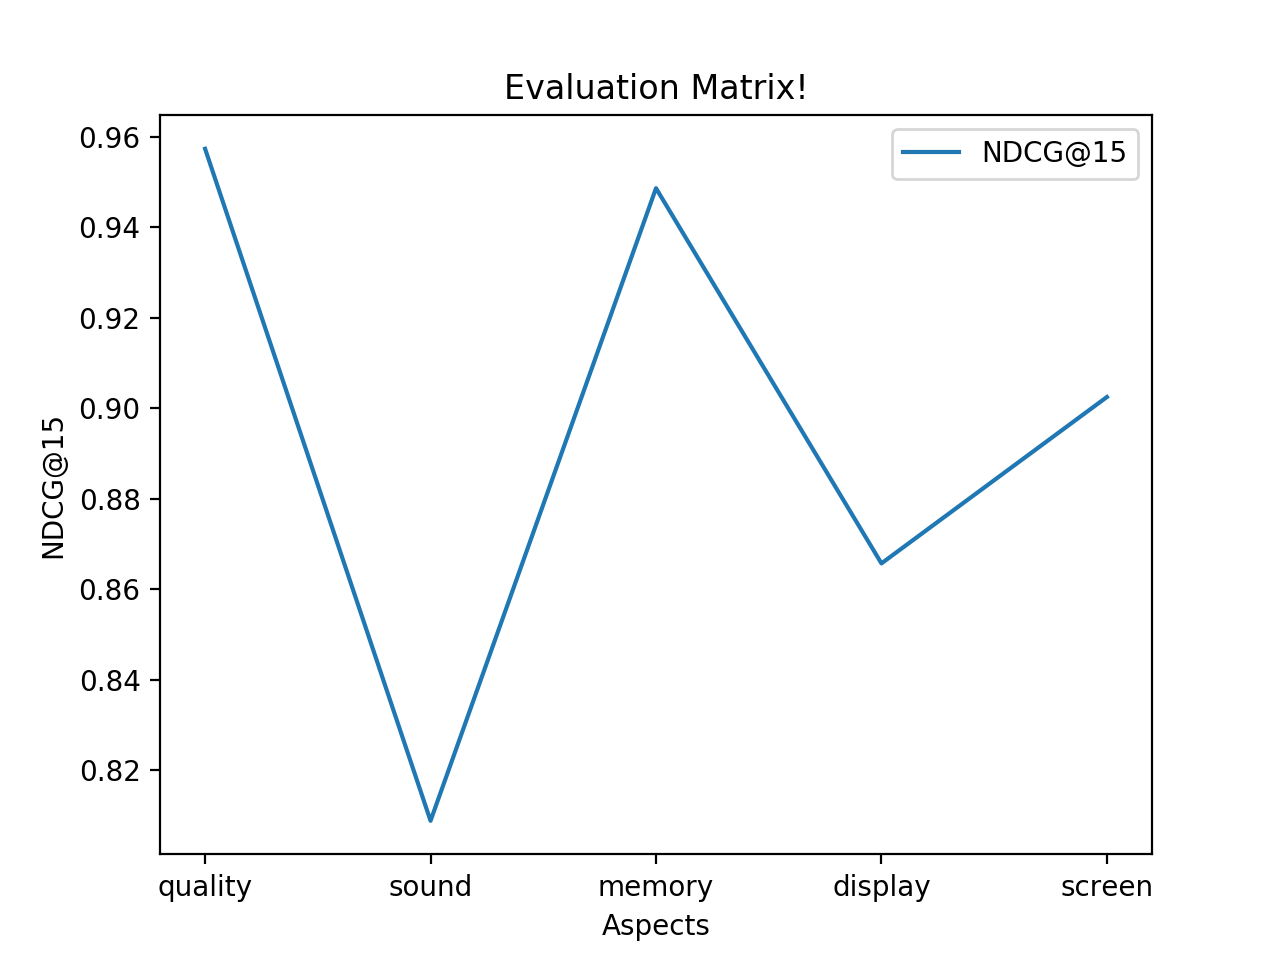

In [475]:
%matplotlib notebook
plt.plot(final_aspect, final_ndcg15, label = "NDCG@15") 
plt.xlabel('Aspects') 
plt.ylabel('NDCG@15') 
plt.title('Evaluation Matrix!') 
plt.legend() 
plt.show()

<IPython.core.display.Javascript object>


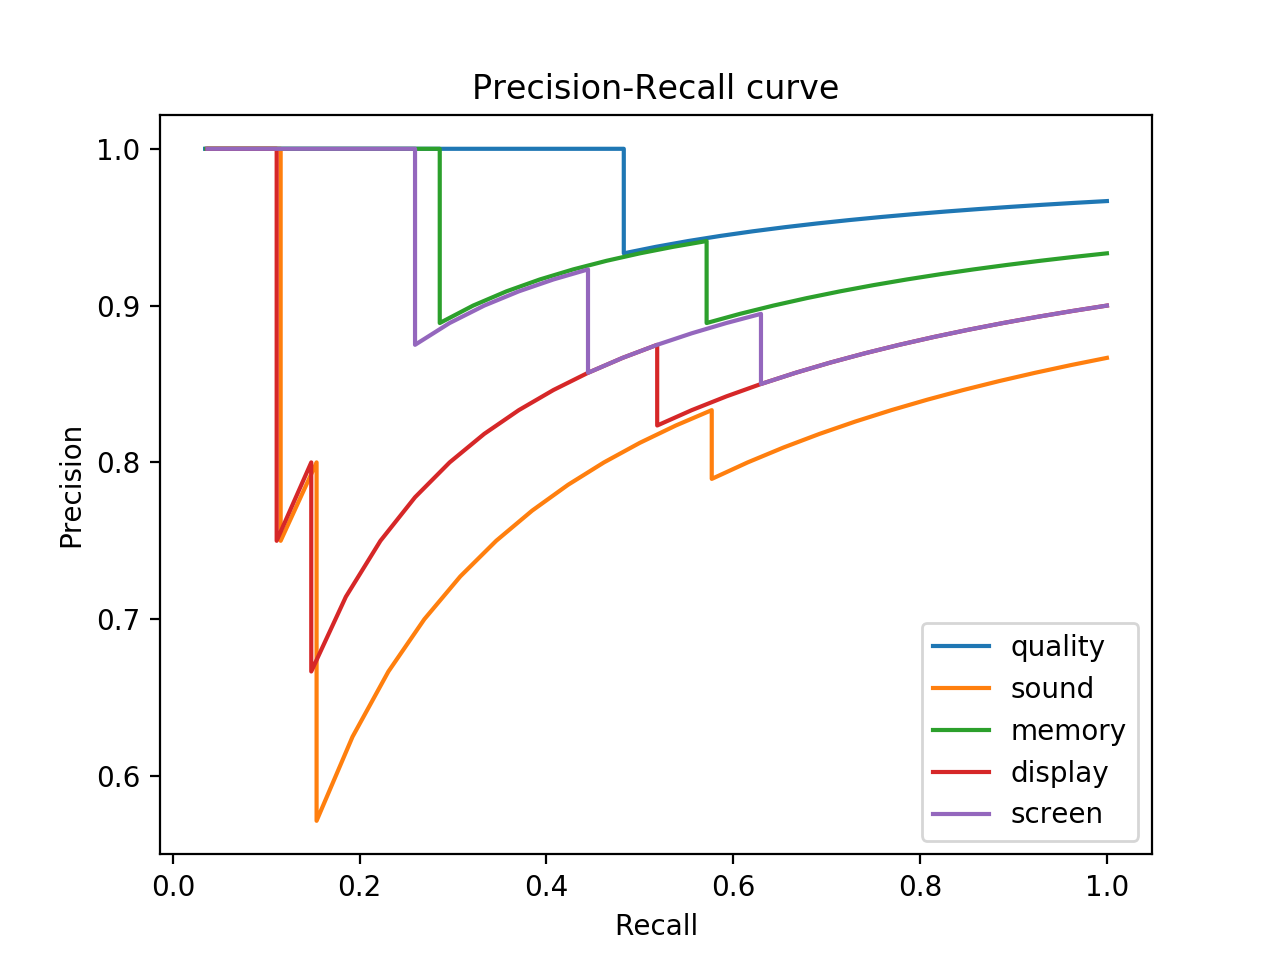

In [486]:
%matplotlib notebook
import matplotlib.pyplot as plt 
plt.plot(final_pr_r[0],final_pr_p[0], label = "quality") 
plt.plot(final_pr_r[1],final_pr_p[1], label = "sound") 
plt.plot(final_pr_r[2],final_pr_p[2], label = "memory") 
plt.plot(final_pr_r[3],final_pr_p[3], label = "display") 
plt.plot(final_pr_r[4],final_pr_p[4], label = "screen") 

plt.ylabel('Precision') 
plt.xlabel('Recall') 

plt.title('Precision-Recall curve') 
plt.legend() 
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

In [47]:
cc=0
bi_grount=[]
for i in range(len(final_retrived[0])):
    bi_grount.append(1)
    
for asp in final_aspect:
    bi_predict=[]
    for pr in final_retrived[cc]:
        if(pr in ground_truth1[asp]):
            bi_predict.append(1)
        else:
            bi_predict.append(0)
    
    tn, fp, fn, tp = confusion_matrix(bi_grount,bi_predict).ravel()
    
    print("***** Aspect:", asp,"*****")
    print("tn=",tn,"  tp=",tp,)
    print("fp=",fp,"  fn=",fn)
    print("Accuracy=",((tp+tn)/(tp+tn+fp+fn))*100)
    print("")
            
        
    cc+=1
    

***** Aspect: quality *****
tn= 0   tp= 29
fp= 0   fn= 1
Accuracy= 96.66666666666667

***** Aspect: sound *****
tn= 0   tp= 26
fp= 0   fn= 4
Accuracy= 86.66666666666667

***** Aspect: memory *****
tn= 0   tp= 28
fp= 0   fn= 2
Accuracy= 93.33333333333333

***** Aspect: display *****
tn= 0   tp= 27
fp= 0   fn= 3
Accuracy= 90.0

***** Aspect: screen *****
tn= 0   tp= 27
fp= 0   fn= 3
Accuracy= 90.0

